#### Import libraries:

In [190]:

sys.path.append('..')
from column import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Setting up the properties of time-space and create the domain:

In [191]:
tend = 0.1
dx = 0.2
L = 40
phi = 0.4
dt = 1e-5

x = np.linspace(0, L, L / dx + 1)
time = np.linspace(0, tend, round(tend / dt) + 1)

In [192]:
# rm = RichardsModel(x, tend, -x)

In [199]:
%timeit rm.solve()

1 loop, best of 3: 234 ms per loop


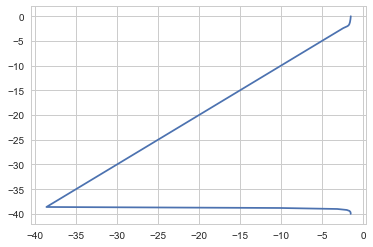

In [194]:
plt.plot(rm.psi[1,:], -rm.z)

In [195]:
# Post process model output to get useful information

# Get water content
theta=thetaFun(rm.psi,rm.p)

# Get total profile storage
S=theta.sum(axis=1)*rm.dz

# Get change in storage [dVol]
dS=np.zeros(S.size)
dS[1:]=np.diff(S)/(rm.t[1]-rm.t[0])

# Get infiltration flux
if rm.qTop == []:
    KTop=KFun(np.zeros(1)+rm.psiTop,rm.p)
    qI=-KTop*((rm.psiTop-rm.psi[:,n-1])/rm.dz*2+1)
else:
    qI=np.zeros(rm.t.size)+rm.qTop
    
# Get discharge flux
if rm.qBot == []:
    if rm.psiBot == []:
        # Free drainage
        KBot=KFun(rm.psi[:,0],rm.p)
        qD=-KBot
    else:
        # Type 1 boundary
        KBot=vg.KFun(np.zeros(1)+psiBot,p)
        qD=-KBot*((psi[:,0]-psiBot)/dz*2+1.0)
else:
    qD=np.zeros(t.size)+qBot

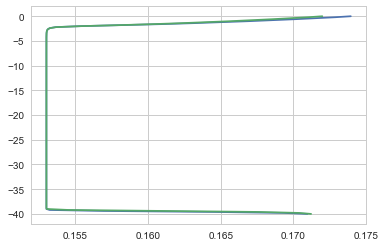

In [196]:
plt.plot(theta[0,:],-rm.z)
plt.plot(theta[1,:],-rm.z)